# <p style="text-align: center;">MIS 285N: Big Data and Distributed Programming</p>
# <p style="text-align: center;">Problem Set 1</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Monday, September 7th submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.   

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Note:**

1. Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)  
2. Give clear spacing and comments for the solution code.

### In this problem set, we will be exploring 5 problems:

Exercise 1 and Exercise 2 would give you an insight on using pandas.  
Exercise 3 will focus on cleaning the dataset for missing datapoints.  
Exercise 4 and Exercise 5 would involve generating graphs based on the traffic dataset.

This exercise discovers an extensive dataset on the subject of traffic on German roads provided by the BASt. It holds detailed numbers of cars, trucks and other vehicle groups passing more than 1,500 automatic counting stations. This dataset records for each counting station are provided on an hourly basis and they reach back to the year 2003.

# Import Libraries and Download data

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
# First, download file from http://www.bast.de/videos/2016_A_S.zip
# Then read the text file.

zipurl = 'http://www.bast.de/videos/2016_A_S.zip'


In [3]:
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall()
print("file is Downloaded")

df_traffic = pd.read_csv(r'2016_A_S.txt', sep = ';')
# Extract required columns and translate column names to English
df_traffic = df_traffic[['Zst', 'Land', 'KFZ_R1', 'KFZ_R2', 'Datum', 'Stunde']]
df_traffic.columns = ['nr', 'land', 'cars_r1', 'cars_r2', 'date', 'hour']
print(df_traffic)

file is Downloaded
           nr  land  cars_r1  cars_r2    date  hour
0        4382    16       16       10  160101     1
1        4382    16       32       26  160101     2
2        4382    16       17       31  160101     3
3        4382    16       11       24  160101     4
4        4382    16       16       21  160101     5
...       ...   ...      ...      ...     ...   ...
7273147  1108     1      931      604  161231    20
7273148  1108     1      620      400  161231    21
7273149  1108     1      696      306  161231    22
7273150  1108     1     1103      297  161231    23
7273151  1108     1      684      220  161231    24

[7273152 rows x 6 columns]


## Exercise 1: Pandas
In this exercise, print the DataFrame and you will notice that the format in which date has been provided as 161231 for 2016-12-31. Write a code to convert the 'date' to DateTime format.The resulting date should appear as '2016-01-01 01:00:00' based on your code.  

In [3]:
# Convert values in 'date' column to DateTime
df_traffic.loc[df_traffic.hour == 24, 'hour'] = 0

# Typecasting date,hour columns to string and Using to_datetime fucntion to convert it into timestamp 
df_traffic['date'] =  pd.to_datetime( df_traffic['date'].astype(str) + '-' + df_traffic['hour'].astype(str),
                                     format='%y%m%d-%H')
df_traffic.date

0         2016-01-01 01:00:00
1         2016-01-01 02:00:00
2         2016-01-01 03:00:00
3         2016-01-01 04:00:00
4         2016-01-01 05:00:00
                  ...        
7273147   2016-12-31 20:00:00
7273148   2016-12-31 21:00:00
7273149   2016-12-31 22:00:00
7273150   2016-12-31 23:00:00
7273151   2016-12-31 00:00:00
Name: date, Length: 7273152, dtype: datetime64[ns]

## Exercise 2: Pandas
In this exercise, based on the total sum across time for each land, print the land parameter with the maximum traffic. You would be using indexing to indetify the land with those maximum traffic. Typically, you should be identifying the land with maximum traffic as one among the 16 values. 

In [5]:
df_sum = df_traffic
df_sum['sum'] = df_sum['cars_r1'] + df_sum['cars_r2']
df_byday_sum = df_sum.set_index('date').groupby(['land', pd.Grouper(freq = 'D')])[['sum']].sum().reset_index()
print(df_byday_sum)
# Identifying land with maximum traffic (cars1 + cars 2) by finding dataframe value which is equal to max value
# of dataframe
print("Land with the maximum traffic is:", 
      df_byday_sum.loc[df_byday_sum['sum'] == df_byday_sum['sum'].max(), 'land'].values[0])


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

## Exercise 3: Missing Values
The code below will randomly generate index and remove the data point from those index. Using a technique of filling missing data, we will try to recover the lost data in the following exercise. 

In [6]:
# Generate random indexes 
import random
import numpy as np

index = []
for x in range(1000):
    index.append(random.randint(1,3000000))
    
index = np.unique(index)
df_missing = df_traffic
df_missing.loc[index,'cars_r1'] = np.nan
df_missing.loc[index,'cars_r2'] = np.nan

In [7]:
# When you print the dataframe you will notice that the values are set to NaN. 
print(df_missing.loc[index])
print(df_missing) 

           nr  land  cars_r1  cars_r2    date  hour   sum
1626     4382    16      NaN      NaN  160308    19   677
3880     4382    16      NaN      NaN  160610    17  1514
11868    4340    16      NaN      NaN  160508    13  1313
12897    4340    16      NaN      NaN  160620    10  1126
14309    4340    16      NaN      NaN  160818     6   123
...       ...   ...      ...      ...     ...   ...   ...
2984983  9535     9      NaN      NaN  161027     8  1479
2988835  9625     9      NaN      NaN  160404    20   880
2990165  9625     9      NaN      NaN  160530     6   924
2991611  9625     9      NaN      NaN  160729    12  3251
2991967  9625     9      NaN      NaN  160813     8  1499

[1000 rows x 7 columns]
           nr  land  cars_r1  cars_r2    date  hour   sum
0        4382    16     16.0     10.0  160101     1    26
1        4382    16     32.0     26.0  160101     2    58
2        4382    16     17.0     31.0  160101     3    48
3        4382    16     11.0     24.0  160101  

### 3.1. In what conditions should NaN values be filled with mean and median? Please share your thoughts briefly.
(This is not going to count toward your grade. Hint: Consider outliers in the data)

In [ ]:
# We can replace the "NAN" value with mean for continuous data without outliers
# We can replace the "NAN" value with median for continuous data with outliers

### 3.2 Write the code to drop the rows with missing values

In [8]:
df_miss_2 = df_missing.dropna(subset=['cars_r1', 'cars_r2'])
print(df_miss_2 )

           nr  land  cars_r1  cars_r2    date  hour   sum
0        4382    16     16.0     10.0  160101     1    26
1        4382    16     32.0     26.0  160101     2    58
2        4382    16     17.0     31.0  160101     3    48
3        4382    16     11.0     24.0  160101     4    35
4        4382    16     16.0     21.0  160101     5    37
...       ...   ...      ...      ...     ...   ...   ...
7273147  1108     1    931.0    604.0  161231    20  1535
7273148  1108     1    620.0    400.0  161231    21  1020
7273149  1108     1    696.0    306.0  161231    22  1002
7273150  1108     1   1103.0    297.0  161231    23  1400
7273151  1108     1    684.0    220.0  161231    24   904

[7272152 rows x 7 columns]


### 3.3 Fill the value with the previous time stamp value


In [9]:
df_miss_3 = df_missing.fillna(method='ffill')
print(df_miss_3.loc[index])


           nr  land  cars_r1  cars_r2    date  hour   sum
1626     4382    16    551.0    455.0  160308    19   677
3880     4382    16    867.0    654.0  160610    17  1514
11868    4340    16    510.0    588.0  160508    13  1313
12897    4340    16    434.0    633.0  160620    10  1126
14309    4340    16     38.0     23.0  160818     6   123
...       ...   ...      ...      ...     ...   ...   ...
2984983  9535     9    468.0    561.0  161027     8  1479
2988835  9625     9    630.0    555.0  160404    20   880
2990165  9625     9    153.0    278.0  160530     6   924
2991611  9625     9   1535.0   1190.0  160729    12  3251
2991967  9625     9    589.0    546.0  160813     8  1499

[1000 rows x 7 columns]


### 3.4 Fill the value with a constant

In [10]:
df_miss_4 = df_missing.fillna(0)
print(df_miss_4.loc[index])


           nr  land  cars_r1  cars_r2    date  hour   sum
1626     4382    16      0.0      0.0  160308    19   677
3880     4382    16      0.0      0.0  160610    17  1514
11868    4340    16      0.0      0.0  160508    13  1313
12897    4340    16      0.0      0.0  160620    10  1126
14309    4340    16      0.0      0.0  160818     6   123
...       ...   ...      ...      ...     ...   ...   ...
2984983  9535     9      0.0      0.0  161027     8  1479
2988835  9625     9      0.0      0.0  160404    20   880
2990165  9625     9      0.0      0.0  160530     6   924
2991611  9625     9      0.0      0.0  160729    12  3251
2991967  9625     9      0.0      0.0  160813     8  1499

[1000 rows x 7 columns]


### 3.5 Fill the value with the mean of value above and below the datapoint

In [11]:
df_miss_5 = df_missing
df_miss_5['cars_r1'] = (df_missing['cars_r1'].fillna(method='ffill') +
                        df_missing['cars_r1'].fillna(method='bfill'))/2
df_miss_5['cars_r2'] = (df_missing['cars_r2'].fillna(method='ffill') +
                        df_missing['cars_r2'].fillna(method='bfill'))/2
print(df_miss_5.loc[index])


           nr  land  cars_r1  cars_r2    date  hour   sum
1626     4382    16    399.5    333.5  160308    19   677
3880     4382    16    803.0    618.0  160610    17  1514
11868    4340    16    523.5    641.5  160508    13  1313
12897    4340    16    422.0    577.0  160620    10  1126
14309    4340    16     71.5    155.0  160818     6   123
...       ...   ...      ...      ...     ...   ...   ...
2984983  9535     9    638.0    651.5  161027     8  1479
2988835  9625     9    510.0    429.5  160404    20   880
2990165  9625     9    352.5    564.0  160530     6   924
2991611  9625     9   1741.5   1259.0  160729    12  3251
2991967  9625     9    826.0    803.5  160813     8  1499

[1000 rows x 7 columns]


## Exercise 4: Plot

# Plot the line chart to identify the number of cars_r1 and cars_r2 vs. date with different colors and legends.

Using the `station` and `station_days`. Analyze what station and station_days represent and how they should be used. It is pretty straight forward.
The plots have been generated and given below for your reference. The code writtern should generate similar graphs. 

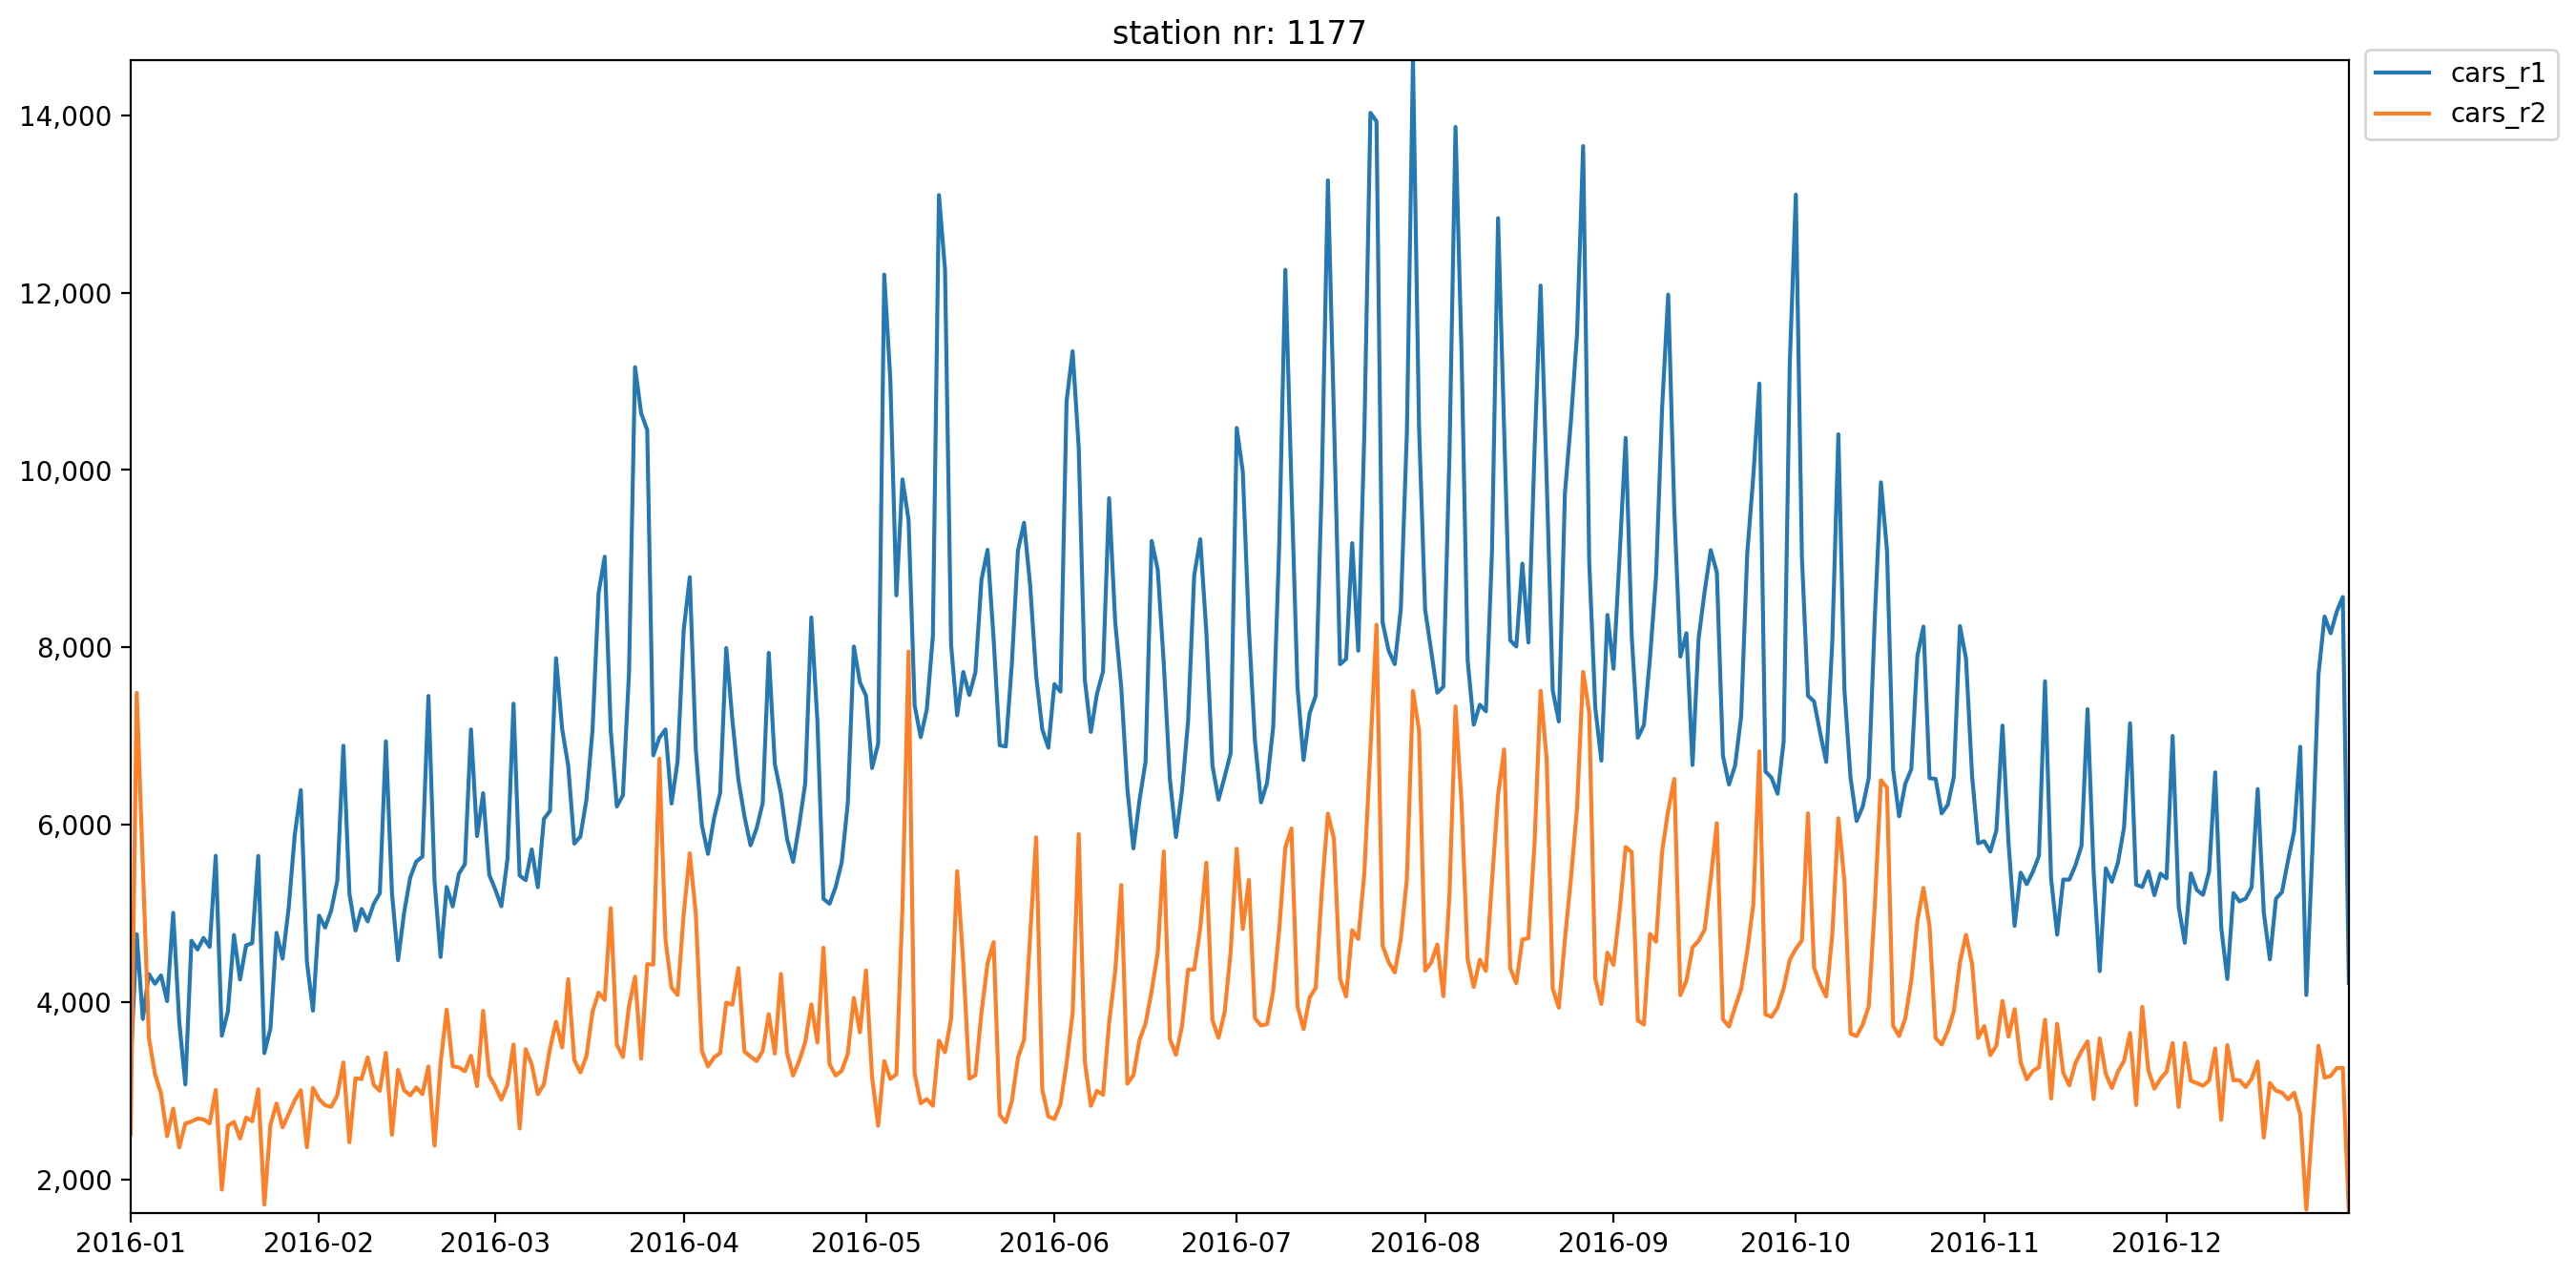

In [12]:
grouped_by_name = df_traffic.groupby(['nr'])

number = 1177
station = grouped_by_name.get_group(number)
station_days = station.set_index('date').groupby([pd.Grouper(freq = 'D')])[['cars_r1', 'cars_r2']].sum().reset_index()

#### your code here###
print(station)
print(station_days)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

No handles with labels found to put in legend.


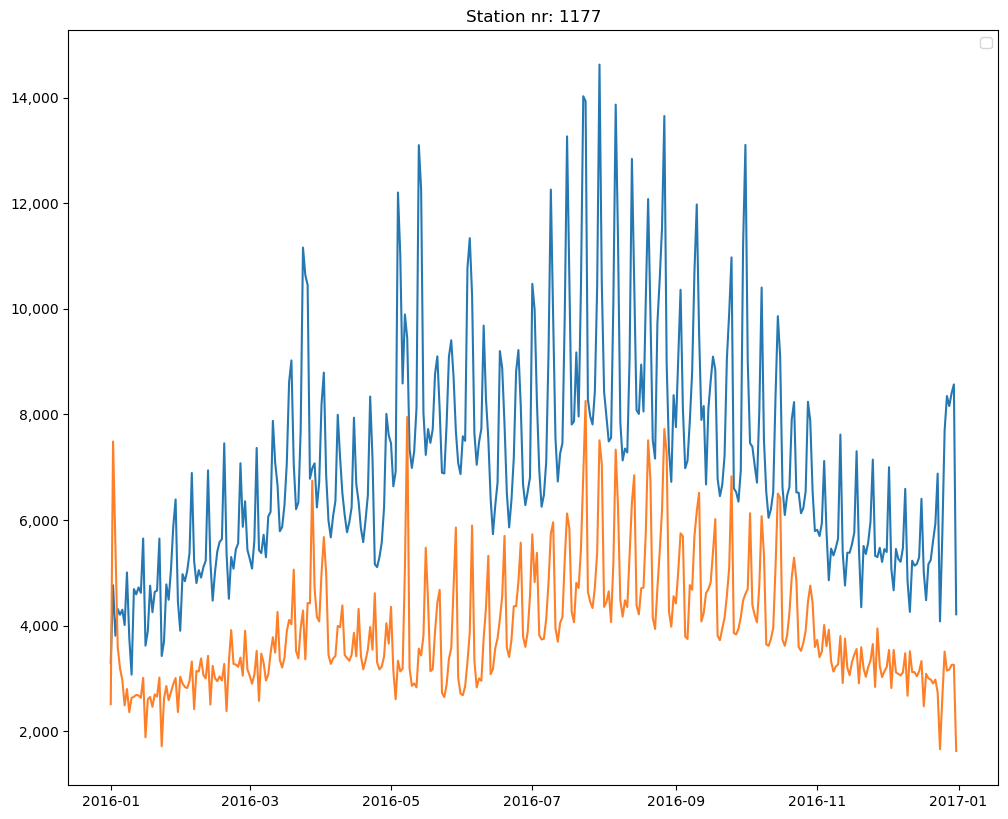

In [12]:
colors = ['#2678B2', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D', '#D42A2F', '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

# Code for plotting the graph for cars_r1 and cars_r2 vs date
fig, axis = plt.subplots(figsize=(12, 10), dpi=100)
axis.plot(station_days['date'], station_days['cars_r1'], c=colors[0])
axis.plot(station_days['date'], station_days['cars_r2'], c=colors[2])
axis.yaxis.set_major_formatter(FuncFormatter(lambda z, q: format(int(z), ',')))
axis.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.title('Station nr: ' + str(number))
plt.show()

## Exercise 5: Plot the scatter plot for the top 3 busiest days per state
### Plot the different group of land vs. date and show the 3 busiest days using the below DataFrames generated.

In [13]:
df_scatter = df_traffic
df_scatter['sum'] = df_scatter['cars_r1'] + df_scatter['cars_r2']
df_byday = df_scatter.set_index('date').groupby(['land', pd.Grouper(freq = 'D')])[['sum']].sum().reset_index()
df_sorted = df_byday.sort_values(by=['sum'], ascending = False)
df_clean = df_sorted.groupby(['land']).head(3)
#print(df_clean)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

#### You have to just write one line inside the for loop and plot.

In [1]:
colors = ['#2678B2', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D', '#D42A2F', '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

groups = df_clean.groupby('land')
scatter_colors = iter(colors)

fig, ax = plt.subplots(figsize = (15, 8), dpi=200)
for name, group in groups:
    dates = group['date'].dt.strftime('%Y-%m-%d').values
    dates = [pd.to_datetime(d) for d in dates]
    
    # scatter function is used for scatterplots
ax.scatter(dates, group['sum'].values, s=10, c=next(scatter_colors), label=name)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc = 'upper right', bbox_to_anchor = (1.1, 1.015))
plt.show()

NameError: name 'df_clean' is not defined